<h1>Project Data Mining</h1>
<br><h2>Sentiment Analysis on tweets</h2>
<br><b>Editors: </b>
<br>Aslanidis Theofanis - Athinaios Konstantinos

<b>1)</b> Importing all needed packages: <br>
<ul>
    <li><b>nltk:</b> used for tokenization
    <li><b>pandas:</b> data representation
    <li><b>WordCloud:</b> data representation
<ul>


In [74]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer, word_tokenize, TweetTokenizer
from wordcloud import WordCloud
import pickle

#nltk.download('punkt')
#nltk.download('stopwords')

<b>2)</b> Loading tweeter datasets for training and testing:
<ul>
    <li><u>Value</u> for negative-positive-neutral
    <li><u>Tweet</u> for the text
</ul>

In [75]:
train_data = pd.read_csv("../twitter_data/train2017.tsv", names=['Value', 'Tweet'], sep='\t', usecols = [2, 3])
test_data = pd.read_csv("../twitter_data/test2017.tsv", names=['Value', 'Tweet'], sep='\t', usecols = [2, 3])
train_data.head()

,Value,Tweet
0,positive,Gas by my house hit $3.39!!!! I'm going to Cha...
1,negative,"Theo Walcott is still shit, watch Rafa and Joh..."
2,negative,"its not that I'm a GSP fan, i just hate Nick D..."
3,negative,Iranian general says Israel's Iron Dome can't ...
4,neutral,"Tehran, Mon Amour: Obama Tried to Establish Ti..."


<h4>Our pipeline:</h4><br>
<ol>
    <li>Load the raw text.
    <li>Split into tokens.
    <li>Convert to lowercase.
    <li>Filter out tokens that are stop words.
    <li>Stemming
</ol>
<br>    
<b>Tokenize tweets and convert all to lowercase</b>


In [3]:
tweets = []
values = []
tokenizer = TweetTokenizer()
for tweet in train_data.T:
    tweets.append(tokenizer.tokenize(train_data.T[tweet][1].lower()))
    values.append(train_data.T[tweet][0])

<b>Remove Stop Words</b>

In [4]:
# filter out stop words
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
for x in range(0,len(tweets)):
    tweets[x] = [token for token in tweets[x] if not token in stop_words and token.isalpha()]

<b>Stemming (Reducing each word to its root).</b>

In [5]:
# stemming of words
from nltk.stem.porter import PorterStemmer

stemmed = []
porter = PorterStemmer()
for x in range(0,len(tweets)):
    stemmed.append([porter.stem(token) for token in tweets[x]])

<b>Run this cell only if you wish to Save the tweets with pickle</b>

In [17]:
#store tweets using pickle
filename = 'tweets.sav'
pickle.dump(tweets, open(filename, 'wb'))

<b>Run this cell only if you wish to LOAD the tweets</b>

In [76]:
#load stored model
filename = 'tweets.sav'
tweets = pickle.load(open(filename, 'rb'))

In [6]:
print(tweets[0], "\n", stemmed[0])

['gas', 'house', 'hit', 'going', 'chapel', 'hill', 'sat'] 
 ['ga', 'hous', 'hit', 'go', 'chapel', 'hill', 'sat']


<h2>Data Analysis</h2>
<br><h4>Characteristics:</h4>
<ul>
    <li><b>Most Frequent</b> words in whole training dataset.
    <li><b>Most Frequent Positive, Negative and Neutral </b> words.
<ul>

In [77]:
from collections import Counter
total_counter = Counter()
positive_counter = Counter()
negative_counter = Counter()
neutral_counter = Counter()
j=0
for i in tweets[0:]: 
    total_counter.update(i)
    if(values[j] == "positive"):
        positive_counter.update(i)
    if(values[j] == "negative"):
        negative_counter.update(i)
    if(values[j] == "neutral"):
        neutral_counter.update(i)
    j+=1
dict(total_counter)
dict(positive_counter)
dict(negative_counter)
dict(neutral_counter)

data = {'Total': total_counter, 'Positive': positive_counter, 'Negative': negative_counter, 'Neutral': neutral_counter}
fp = DataFrame(data, index =total_counter.keys(), columns =['Total','Positive','Negative', 'Neutral'])

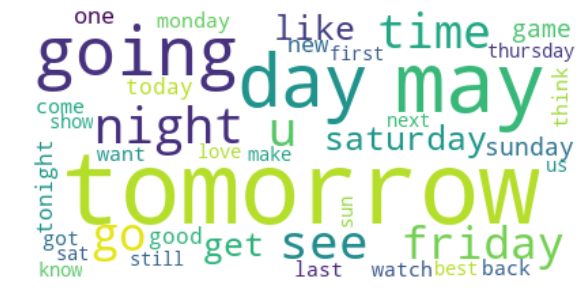

In [78]:
# Create and generate a word cloud image:
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=40).generate_from_frequencies(total_counter)

plt.figure(figsize=(12,5))
# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3>Graph showing the exact Frequency of appearance for the Most Frequent Words</h3>

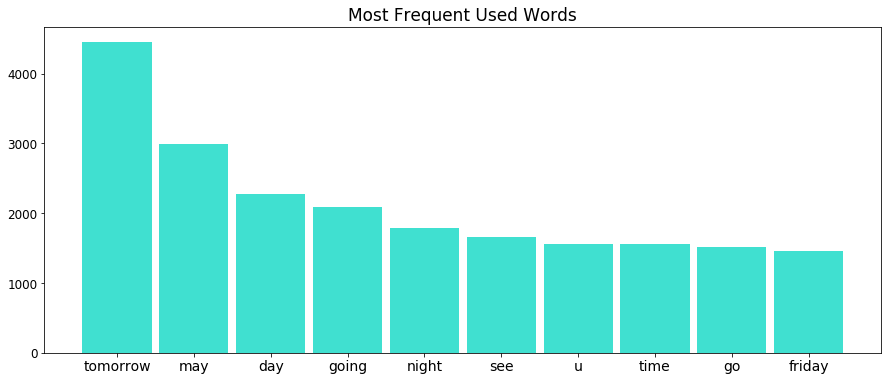

In [79]:
# Choose the names of the bars
words = list(wc.words_.keys())

# Find frequencies
freq = []
for word in words:
    freq.append(total_counter[word])
    
#np array
y_pos = np.arange(len(words[:10]))

#size
plt.figure(figsize=(15,6))
plt.title("Most Frequent Used Words", fontsize=17)

# Create bars
plt.bar(y_pos, freq[:10], color='turquoise', width=0.9)
 
# Create names on the x-axis
plt.xticks(y_pos, words, color='black', fontsize=14)
plt.yticks(color='black', fontsize=12)
plt.show()

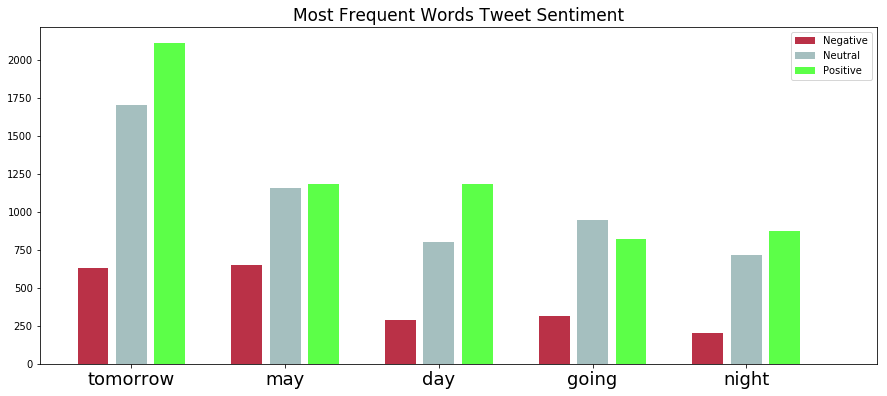

In [80]:
#FiveMostFrequent
FiveMostFrequent = list(wc.words_.keys())[:5]

# Create bars
barWidth = 0.8
bars1 = []
bars2 = []
bars3 = []
for word in FiveMostFrequent:
    bars1.append(negative_counter[word])
    bars2.append(neutral_counter[word])
    bars3.append(positive_counter[word])
    
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1,5,9,13,17]
r2 = [2,6,10,14,18]
r3 = [3,7,11,15,19]
sep =[4,8,12,16,20]
r4 = r1 + r2 + r3 + sep

# plot size
plt.figure(figsize=(15,6))

# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.7,0.1,0.2,0.9), label='Negative')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.5,0.5), label='Neutral')
plt.bar(r3, bars3, width = barWidth, color = (0.2,1.0,0.1,0.8), label='Positive')
plt.bar(sep, [0,0,0,0,0], width = barWidth, color = (0.0,0.0,0.0,0.0))
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
plt.title("Most Frequent Words Tweet Sentiment", fontsize=17) 
# Text below each barplot with a rotation at 90°
plt.xticks([4*r + barWidth*2.5 for r in range(len(FiveMostFrequent))], FiveMostFrequent, fontsize=18)
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
plt.show()

<h3>Below we have the most Positive words</h3><br>
<b>Not only measured by appearances on positive tweets </b>, but the <b>ratio between positive and negative</b> is very high<br>
Which means that they appeared exponentially more times in positive tweets rather than negative ones.<br>
That way we have a more representative result.

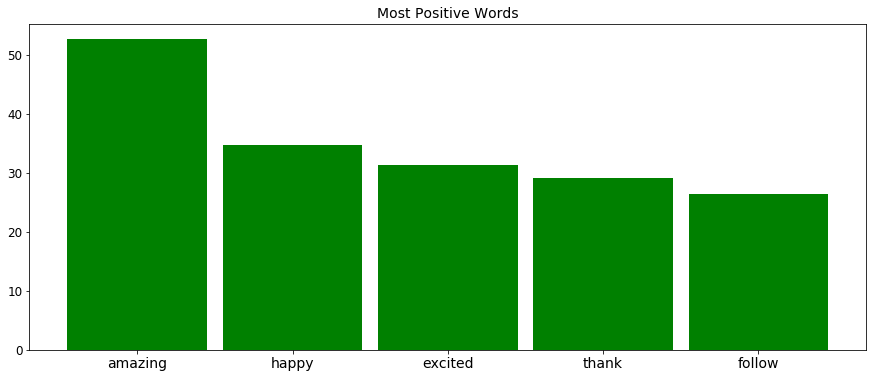

In [81]:
UsedWords = [word for word in total_counter.keys() if total_counter[word] >= 100]
UsedWords.sort(key=lambda word: (positive_counter[word]/negative_counter[word]), reverse=True)
HighRatioWords = UsedWords[:5]

# Find ratio
ratio = []
for word in HighRatioWords:
    ratio.append(positive_counter[word]/negative_counter[word])
#np array
y_pos = np.arange(len(HighRatioWords))
#size
plt.figure(figsize=(15,6))

# Create bars
plt.bar(y_pos, ratio, color='green', width=0.9)
 
# Create names on the x-axis
plt.title('Most Positive Words', fontsize=14)
plt.xticks(y_pos, HighRatioWords, color='black', fontsize=14)
plt.yticks(color='black', fontsize=12)
plt.show()

<h2>OBSERVATION !</h2>
<h4>As we see, "tomorrow" has the most appearances in positive tweets, but the ones that are used purely on positive tweets are "amazing", "happy", "excited" ... </h4>


<h3>Same way as above now we have the most Negative words</h3><br>
<b>Not only measured by appearances on negative tweets </b>, but the <b>ratio between positive and negative</b> is very low<br>
Which means that they appeared exponentially more times in negative tweets rather than positive ones.<br>
That way we have a more representative result.

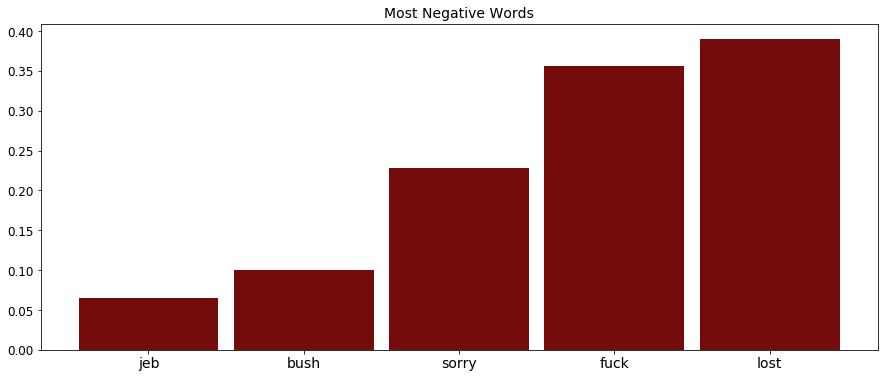

In [82]:
UsedWords = [word for word in total_counter.keys() if total_counter[word] >= 100]
UsedWords.sort(key=lambda word: (positive_counter[word]/negative_counter[word]))
LowRatioWords = UsedWords[:5]

# Find ratio
ratio = []
for word in LowRatioWords:
    ratio.append(positive_counter[word]/negative_counter[word])
#np array
y_pos = np.arange(len(LowRatioWords))
#size
plt.figure(figsize=(15,6))

# Create bars
plt.bar(y_pos, ratio, color='#750c0c', width=0.9)
 
# Create names on the x-axis
plt.title('Most Negative Words', fontsize=14)
plt.xticks(y_pos, LowRatioWords, color='black', fontsize=14)
plt.yticks(color='black', fontsize=12)
plt.show()

<h1>Vectorization</h1>
<br>
<h2> Bag Of Words</h2>
Create bow and store it with pickle

<b>Run this only if you want to do the vectorization</b><br>
Carefull you will have to store it later!!!

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

#vectorization
bow_vectorizer = CountVectorizer(max_features=1000) 
bow_xtrain = bow_vectorizer.fit_transform(train_data['Tweet'])  #TWEETS : a list with the actual tweets

<b>Run this only if you excecuted the above cell and you want to save the vector<b>

In [46]:
#store bow using pickle
filename = 'bag_of_words.sav'
pickle.dump(bow_xtrain, open(filename, 'wb'))

<b>Run this only if you have already stored the bag of words</b> and you wish to load it instead of computing it.

In [150]:
#load stored model
filename = 'bag_of_words.sav'
bow_xtrain = pickle.load(open(filename, 'rb'))

<h2>TF-IDF</h2>

<b>Run this only if you want to do the vectorization</b><br>
Carefull you will have to store it later!!!

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000) 
tfidf = tfidf_vectorizer.fit_transform(train_data['Tweet'])  #TWEETS : a list with the actual tweets

<b>Run this only if you excecuted the above cell and you want to save the vector<b>

In [63]:
#store bow using pickle
filename = 'tf_idf.sav'
pickle.dump(tfidf, open(filename, 'wb'))

<b>Run this only if you have already stored the bag of words</b> and you wish to load it instead of computing it.

In [166]:
#load stored model
filename = 'tf_idf.sav'
tfidf = pickle.load(open(filename, 'rb'))

<h2>Word Embeddings</h2><br>
Using: <br>
1. Tokenized tweets<br>
2. Stemmed tweets<br><br>
What is the difference ?

In [102]:
from gensim.models import Word2Vec

model_w2v = Word2Vec(
            tweets,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 8, # no.of cores
            seed = 34) 

model_w2v.train(tweets, total_examples= len(tweets), epochs=20)

(5034616, 5636720)

<b>Run this only if you excecuted the above cell and you want to save the vector<b>

In [103]:
#store bow using pickle
filename = 'word_embed.sav'
pickle.dump(model_w2v, open(filename, 'wb'))

<b>Else Run this if you have already stored the bag of words to load it instead of computing it.</b>

In [85]:
#load stored model
filename = 'word_embed.sav'
model_w2v = pickle.load(open(filename, 'rb'))

Now we trained model for epochs and it is ready.<br>
Let's play with our trained model and see some results.

In [104]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.9280077219009399),
 ('propose', 0.643905520439148),
 ('jeb', 0.6068708896636963),
 ('bush', 0.594193696975708),
 ('criticize', 0.5551106333732605),
 ('loyalty', 0.5468491911888123),
 ('stance', 0.5369409322738647),
 ('suggested', 0.5352365970611572),
 ('pledge', 0.5307555794715881),
 ('essentially', 0.526955246925354)]

As we see those are the words that are seen with trump and developed a semantic relationship.

<h3>TSNE graphs below</h3>
Function tsne_plot call for a subset of our model, our whole word2vec is quite dense to visualize it

In [30]:
from sklearn.manifold import TSNE

def tsne_plot(model, w2v):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word, val in model:
        tokens.append(w2v.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/fanarosss/Programms/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


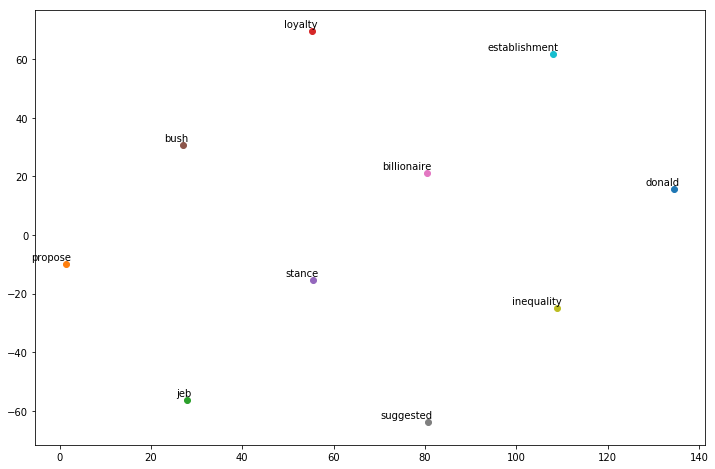

In [31]:
tsne_plot(model_w2v.wv.most_similar(positive='trump'), model_w2v)

<h1>Classification</h1><br>

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

n_estimators=20
workers=4

<h3>Bag Of Words</h3>

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(bow_xtrain, train_data['Value'], test_size = 0.20)

svclassifier = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear'), max_samples=1.0 / n_estimators, n_estimators=n_estimators, n_jobs=workers)) 
svclassifier.fit(X_train, Y_train)

Y_pred = svclassifier.predict(X_test) 

confusion_matrix(Y_test,Y_pred) 
print(classification_report(Y_test,Y_pred))

[[ 233  470  209]
 [  89 1852  449]
 [  80  807 1403]]
              precision    recall  f1-score   support

    negative       0.58      0.26      0.35       912
     neutral       0.59      0.77      0.67      2390
    positive       0.68      0.61      0.64      2290

   micro avg       0.62      0.62      0.62      5592
   macro avg       0.62      0.55      0.56      5592
weighted avg       0.63      0.62      0.61      5592



<h3>TFIDF</h3>

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(tfidf, train_data['Value'], test_size = 0.20) 

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

Y_pred = svclassifier.predict(X_test) 

confusion_matrix(Y_test,Y_pred) 
print(classification_report(Y_test,Y_pred))

[[ 308  407  165]
 [ 119 1927  377]
 [  97  813 1379]]
              precision    recall  f1-score   support

    negative       0.59      0.35      0.44       880
     neutral       0.61      0.80      0.69      2423
    positive       0.72      0.60      0.66      2289

   micro avg       0.65      0.65      0.65      5592
   macro avg       0.64      0.58      0.60      5592
weighted avg       0.65      0.65      0.64      5592



<h3>Word Embeddings</h3><br>
Since we can't pass the word2key vector directly in svclassifier sue to multiple features, we need to do some processing in order to achieve the shape expected.

In [167]:
%%capture
max_features=1000

def w2v_mean(model, tweets):
    w2v_train = np.zeros((len(tweets),max_features))
    i = 0
    for tweet in tweets:
        j = 0
        for word in tweet:
            if word in model.wv.vocab:
                w2v_train[i][j] = np.mean(model.wv[word])
                j+=1
        i+=1;

    return w2v_train

In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(w2v_mean(model_w2v, tweets), train_data['Value'], test_size = 0.20) 

svclassifier = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True), max_samples=1.0 / n_estimators, n_estimators=n_estimators, n_jobs=workers))
svclassifier.fit(X_train, Y_train)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.05, n_estimators=20, n_jobs=4, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
          n_jobs=None)

In [169]:
Y_pred = svclassifier.predict(X_test) 

confusion_matrix(Y_test,Y_pred)  
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

    negative       0.20      0.00      0.00       899
     neutral       0.48      0.39      0.43      2390
    positive       0.46      0.73      0.57      2303

   micro avg       0.47      0.47      0.47      5592
   macro avg       0.38      0.38      0.34      5592
weighted avg       0.43      0.47      0.42      5592



In [171]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.4708512160228898